# Project 3 
#### Computational Social Science, Fall 2020
#### Team 2: Elizabeth Breen, Madeleine Parker, Mahader Tamene


In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split

# Make sure to import other libraries that will be necessary for training models!

In [2]:
# Inspections Data 2011 - 2013
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv")

# Inspections Data 2014
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (43) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [4]:
# List column names
chicago_inspections_2011_to_2013.columns
#len(chicago_inspections_2011_to_2013.columns)
# 75 total columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [5]:
# Drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                'Address',
                                                'City',
                                                'State',
                                                'Zip',
                                                'Latitude',
                                                'Longitude',
                                                'Location',
                                                'ID',
                                                'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                'ACCOUNT_NUMBER',
                                                'LEGAL_NAME',
                                                'DOING_BUSINESS_AS_NAME',
                                                'ADDRESS',
                                                'CITY',
                                                'STATE',
                                                'ZIP_CODE',
                                                'WARD',
                                                'PRECINCT',
                                                'LICENSE_CODE',
                                                'BUSINESS_ACTIVITY_ID',
                                                'BUSINESS_ACTIVITY',
                                                'LICENSE_NUMBER',
                                                'LATITUDE',
                                                'LONGITUDE',
                                                'pass_flag',
                                                'fail_flag',
                                                'criticalCount', 
                                                'seriousCount',
                                                'minorCount'],inplace = True)

chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [6]:
# Convert the Inspection Date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'], infer_datetime_format=True)  

In [7]:
#len(chicago_inspections_2011_to_2013.columns)
#39 columns

## Visualization

<b> What do inspections look like over time? </b>

At first glance, the values seem to fluctuate with no real pattern. We do see dips around Jan and July of each year and peaks in April and October.  2013 also has overall more inspections than 2012.

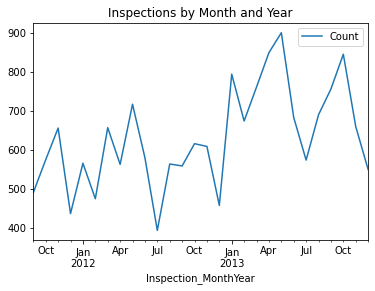

In [8]:
# Visualize Inspections Over Time
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year")

<b>What do the results look like?</b>

A good majority of the facilities passed inspection (68%), with few failing (20%) and a small percentage passing w/ conditions (12%).

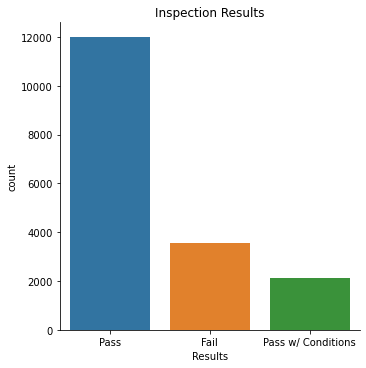

In [9]:
# Inspection Results
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

<b> What if we separate by facility type? </b>

Restaurants are the most common facility type across all inspection results.

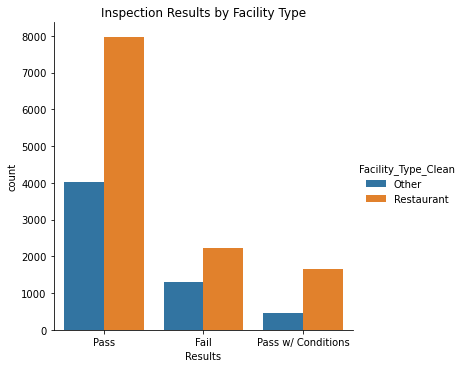

In [10]:
# Inspection Results by Facility Type (Restaurant or Not)
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count",
           hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


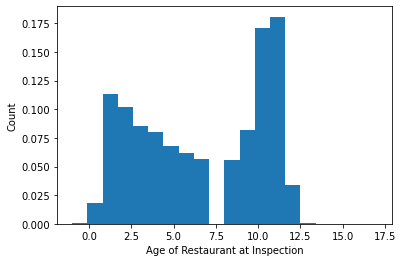

In [11]:
# Is there a trend in age of restaurant vs # of failures?

age = round(chicago_inspections_2011_to_2013['ageAtInspection'])

chicago_inspections_2011_to_2013['age'] = age


x = chicago_inspections_2011_to_2013['age']
plt.hist(x, density=True, bins=20)  # `density=False` would make counts
plt.ylabel('Count')
plt.xlabel('Age of Restaurant at Inspection');

In [12]:
# recode into 3 age bins, new, mid, old

def age_groups(series):
    if series < 5:
        return "young"
    elif 5 <= series < 9:
        return "middle"
    elif 9 <= series:
        return "old"
    
chicago_inspections_2011_to_2013['age_groups'] = chicago_inspections_2011_to_2013['age'].apply(age_groups)
chicago_inspections_2011_to_2013['age_groups'].value_counts(sort=False)
    
    

old       6640
middle    3440
young     5684
Name: age_groups, dtype: int64

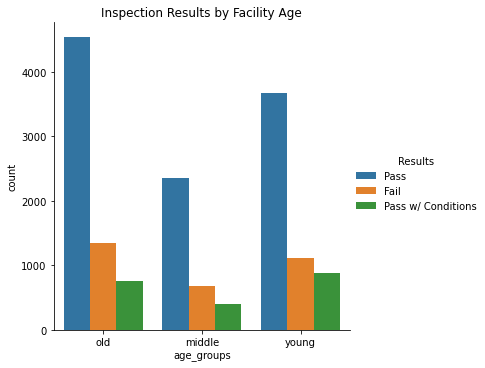

In [13]:
# Inspection Results by Age of Facility
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "age_groups",
           kind = "count",
           hue = 'Results')

plt.title("Inspection Results by Facility Age")
plt.show()



## Preprocess Data

In [14]:
# Drop datetime info
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                      'minDate',
                                      'maxDate',
                                      'Inspection_MonthYear'],
                                      axis = 1)

In [15]:
# Set target variable. 
y = chicago_inspections_2011_to_2013['Results']
## Comment out the following code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)
# Recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)

# All other features in X
X = chicago_inspections_2011_to_2013.drop(columns = ['Results'])
X = pd.get_dummies(X)

In [16]:
X.head()

pastFail  pastCritical  \
Inspection_ID DBA_Name                                               
269961        SEVEN STAR                           0             0   
507211        PANERA BREAD                         0             0   
507212        LITTLE QUIAPO RESTAURANT             0             0   
507216        SERGIO'S TAQUERIA PIZZA INC.         0             0   
507219        TARGET STORE # T-2079                0             0   

                                            pastSerious  pastMinor  \
Inspection_ID DBA_Name                                               
269961        SEVEN STAR                              0          0   
507211        PANERA BREAD                            0          0   
507212        LITTLE QUIAPO RESTAURANT                0          0   
507216        SERGIO'S TAQUERIA PIZZA INC.            0          0   
507219        TARGET STORE # T-2079                   0          0   

                                            timeSinceLast  firstRecord  \
Inspection_ID DBA_Name                                                   
269961        SEVEN STAR                              2.0            1   
507211        PANERA BREAD                            2.0            1   
507212        LITTLE QUIAPO RESTAURANT                2.0            1   
507216        SERGIO'S TAQUERIA PIZZA INC.            2.0            1   
507219        TARGET STORE # T-2079                   2.0            1   

                                            POLICE_DISTRICT  ageAtInspection  \
Inspection_ID DBA_Name                                                         
269961        SEVEN STAR                               19.0        10.964384   
507211        PANERA BREAD                             24.0         7.457534   
507212        LITTLE QUIAPO RESTAURANT                 17.0         4.578082   
507216        SERGIO'S TAQUERIA PIZZA INC.             17.0         7.805479   
507219        TARGET STORE # T-2079                    24.0         5.290411   

                                            consumption_on_premises_incidental_activity  \
Inspection_ID DBA_Name                                                                    
269961        SEVEN STAR                                                              0   
507211        PANERA BREAD                                                            0   
507212        LITTLE QUIAPO RESTAURANT                                                0   
507216        SERGIO'S TAQUERIA PIZZA INC.                                            0   
507219        TARGET STORE # T-2079                                                   0   

                                            tobacco  package_goods  \
Inspection_ID DBA_Name                                               
269961        SEVEN STAR                          1              0   
507211        PANERA BREAD                        0              0   
507212        LITTLE QUIAPO RESTAURANT            0              0   
507216        SERGIO'S TAQUERIA PIZZA INC.        0              0   
507219        TARGET STORE # T-2079               0              1   

                                            outdoor_patio  \
Inspection_ID DBA_Name                                      
269961        SEVEN STAR                                0   
507211        PANERA BREAD                              0   
507212        LITTLE QUIAPO RESTAURANT                  0   
507216        SERGIO'S TAQUERIA PIZZA INC.              0   
507219        TARGET STORE # T-2079                     0   

                                            public_place_of_amusement  \
Inspection_ID DBA_Name                                                  
269961        SEVEN STAR                                            0   
507211        PANERA BREAD                                          0   
507212        LITTLE QUIAPO RESTAURANT                              0   
507216        SERGIO'S TAQUERIA PIZZA INC.                  

### Look for correlations

In [17]:
chicago_inspections_2011_to_2013.corr(method='pearson', min_periods=1)

,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,age
pastFail,1.000000,0.279907,0.774943,0.370640,-0.319734,-0.356773,0.019537,0.063618,0.028218,-0.024086,-0.028876,0.015291,0.013804,-0.030412,-0.038240,0.002491,-0.000265,-0.025197,-0.007206,-0.006469,0.010965,-0.003179,-0.042200,0.013578,0.027146,0.027364,0.004176,0.021180,0.063026
pastCritical,0.279907,1.000000,0.313040,0.325807,-0.217906,-0.261541,0.041286,0.043256,0.013402,-0.033215,-0.014576,0.011069,0.007356,-0.013769,-0.034756,-0.006850,-0.005204,-0.021757,0.004578,-0.008971,0.009329,0.016216,-0.035695,0.018796,0.014806,-0.011436,0.023169,0.063159,0.042173
pastSerious,0.774943,0.313040,1.000000,0.410094,-0.305562,-0.365730,0.025437,0.054494,0.024672,-0.022797,-0.017841,0.009254,0.015981,-0.031086,-0.039261,-0.016038,-0.005063,-0.025875,-0.008620,-0.009020,0.012799,0.001241,-0.053632,0.023330,0.032342,0.020384,0.027281,0.029996,0.054003
pastMinor,0.370640,0.325807,0.410094,1.000000,-0.725742,-0.828602,0.022207,0.162585,0.032901,-0.073644,-0.040499,0.007485,0.004168,-0.081263,-0.083594,-0.005138,-0.000950,-0.051969,0.004860,-0.012303,0.007173,-0.008930,-0.067570,0.036705,-0.033242,0.007690,-0.022529,0.009945,0.161204
timeSinceLast,-0.319734,-0.217906,-0.305562,-0.725742,1.000000,0.904231,0.022324,-0.140851,-0.025910,0.113073,0.055232,-0.002182,0.000619,0.091839,0.079394,0.006609,-0.003161,0.062396,-0.000855,0.009077,-0.008515,0.036889,0.030688,-0.004858,0.079579,0.059509,0.080246,0.029767,-0.140670
firstRecord,-0.356773,-0.261541,-0.365730,-0.828602,0.904231,1.000000,0.017136,-0.171433,-0.020656,0.107931,0.055717,-0.002295,-0.000257,0.099463,0.091944,0.010458,0.002249,0.063072,-0.000697,0.012669,-0.002827,0.019771,0.082166,-0.042371,0.069799,0.061113,0.066862,0.026944,-0.170056
POLICE_DISTRICT,0.019537,0.041286,0.025437,0.022207,0.022324,0.017136,1.000000,0.019036,0.058356,-0.030443,0.004616,0.030362,0.020131,-0.016955,-0.016314,0.033367,0.029280,-0.008980,-0.018387,0.006053,-0.010020,0.018117,-0.020507,-0.006847,0.067322,0.143206,0.100916,0.057399,0.018910
ageAtInspection,0.063618,0.043256,0.054494,0.162585,-0.140851,-0.171433,0.019036,1.000000,0.062877,0.047559,0.079227,0.008186,0.017748,0.037944,0.001114,0.067508,0.036390,-0.006086,0.002951,-0.031096,0.010530,0.011573,-0.010497,0.008439,-0.033194,-0.019431,-0.033107,-0.028039,0.996895
consumption_on_premises_incidental_activity,0.028218,0.013402,0.024672,0.032901,-0.025910,-0.020656,0.058356,0.062877,1.000000,-0.045482,-0.027439,0.304353,0.271189,-0.011431,-0.060194,-0.030413,0.057758,-0.040511,0.165447,0.008199,-0.007067,0.031425,-0.008798,-0.006341,0.033937,-0.086438,-0.006729,0.055050,0.062391
tobacco,-0.024086,-0.033215,-0.022797,-0.073644,0.113073,0.107931,-0.030443,0.047559,-0.045482,1.000000,0.495342,-0.002486,0.027239,0.420337,-0.052968,0.023254,-0.021119,0.355764,-0.009487,-0.013672,0.014196,0.000112,-0.006407,0.022295,0.056906,0.104048,0.068242,0.014106,0.048449


In [18]:
X.shape

(15311, 2043)

In [19]:
cor_matrix = X.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.70)]
X.drop(to_drop, axis=1, inplace=True)

## Fit Models

In [20]:
# Set seed
np.random.seed(10)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .80, test_size=0.20,
                                                   stratify=y)

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, train_size = .75, test_size = .25, 
                                                           stratify = y_train)

### Model 1 - SVM

Be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using train/validation splits or cross-validation)

In [ ]:
# Use GridSearchCV to do hyperparameter tuning

# hyperparameters that can be tuned for SVM include kernel, C, gamma



1. Run the grid search to find the best hyperparameters
2. Use cross-validation on the model with the best hyperparameters (this should be something like "grid.best_estimator_" assuming you've trained a GridSearchCV and assigned it as "grid") on X and y
3. Use cross_val_score to get accuracy, precision, etc.

In [22]:
param_grid = {'C' : (50, 10, 1.0, 0.1, 0.01),
               'gamma' : ['scale', 'auto']}

# create a model
svm = SVC()

In [23]:
svm_model = svm.fit(X_train, y_train.ravel())

y_pred = svm_model.predict(X_validate)

In [24]:
def rmse(pred, actual):
    return np.sqrt(np.mean((pred - actual) ** 2))

#### Hyperparameter Tuning Using Grid Search for SVM

In [ ]:
svm_grid_reg = GridSearchCV(svm_model, param_grid, cv=3, iid=False)
svm_grid_reg.fit(X_train, y_train.ravel())

best_index = np.argmax(svm_grid_reg.cv_results_["mean_test_score"])
best_svm_pred = svm_grid_reg.best_estimator_.predict(X_validate)

print(svm_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(svm_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', svm_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_svm_pred, y_validate))

In [ ]:
svm_CV_score = cross_val_score(svm_grid_reg, X_validate, y_validate.ravel(), cv=3)



In [ ]:
cf_matrix = confusion_matrix(y_validate, best_svm_pred, normalize = "true")

df_cm = pd.DataFrame(cf_matrix, range(2),
                  range(2))

df_cm = df_cm.rename(index=str, columns={0: "Pass", 1: "Fail"})
df_cm.index = ["Pass", "Fail"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Model 2 - Logistic Regression

Be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using train/validation splits or cross-validation)

#### 1. Importing apporpriate library from sklearn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

#### 2. Setting up hyperparameter grid 

Splitting the data into train, validation, and test sets.

In [ ]:
# Set seed
np.random.seed(10)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .80, test_size=0.20,
                                                   stratify=y)

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, train_size = .75, test_size = .20, 
                                                           stratify = y_train)

Fit the logistic model.

In [ ]:
# create a model
logit_reg = LogisticRegression()

# fit the model
logit_model = logit_reg.fit(X_train, y_train)

logit_pred = logit_model.predict(X_validate)

Using GridSearchCV to search for optimal hyperparameters

In [ ]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')
from sklearn.metrics import accuracy_score

param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
             'C': np.arange(.1, 1, .1),
               'fit_intercept': ['True', 'False'],
             'solver': ['liblinear', 'saga']}

logit_grid = GridSearchCV(logit_model, param_grid, cv=3, iid=False)
logit_grid.fit(X_train, y_train)

best_index = np.argmax(logit_grid.cv_results_["mean_test_score"])
best_logit_pred = logit_grid.best_estimator_.predict(X_validate)

print(logit_grid.cv_results_["params"][best_index])
print('Validation Accuracy', accuracy_score(best_logit_pred, y_validate))

#### 3. Finding best hyperparameters and re-fitting the model

Best hyperparameters from our tuning show: 
'C': 0.1, 'fit_intercept': 'True', 'penalty': 'l1', 'solver': 'saga'}

Validation Accuracy 0.9151020408163265

In [ ]:
## Logistic (redone with best hyperparameters) ## 

# create the model
logit_reg_update = LogisticRegression(C=0.1, fit_intercept=True, penalty='l1', solver='saga')  

# fit the model
logit_model_update = logit_reg_update.fit(X_train, y_train)

# use the model to make predictions
logit_pred_update = logit_model_update.predict(X_validate)

Confusion matrix to visualize how well we did with our predictions using the updated model that has been hyperparameterized

In [ ]:
cf_matrix = confusion_matrix(y_validate, logit_pred_update, normalize = "true")

df_cm = pd.DataFrame(cf_matrix, range(2),
                  range(2))

df_cm = df_cm.rename(index=str, columns={0: "Pass", 1: "Fail"})
df_cm.index = ["Pass", "Fail"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
#do similar to elizabeth -- change confusion matrix to blot y_validate against best_logit_pred
#instead of y_pred_refit (should be same thing)


cf_matrix = confusion_matrix(y_validate, best_logit_pred, normalize = "true")

df_cm = pd.DataFrame(cf_matrix, range(2),
                  range(2))

df_cm = df_cm.rename(index=str, columns={0: "Pass", 1: "Fail"})
df_cm.index = ["Pass", "Fail"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Logistic regression does a pretty good job predicting pass but not a good job predicting fails.

### Model 3 - Decision tree

Detail the basic logic and assumptions underlying each model, its
pros/cons, and why it is a plausible choice for this problem.

Set up a hyperparameter grid (check out our previous labs to see how to do this)
Find the best hyperparameters, and then fit your model (using train/validation splits or cross-validation)

Run the grid search to find the best hyperparameters
Use cross-validation on the model with the best hyperparameters (this should be something like "grid.best_estimator_" assuming you've trained a GridSearchCV and assigned it as "grid") on X and y
Use cross_val_score to get accuracy, precision, etc.

##### About Decision trees: 

Decision trees use a series of if/then rules to infer from the data and predict the values of new variables. 

Pros: Decision trees are simple, do not require a lot of prior processing or data manipulation, and are very transparent: they're easy to validate, and to interpret. 
    They also don't make assumptions about the shape or form of the data.
    
Cons: Decision trees can overfit the data, and can create biased trees if the data is not balanced. 

In [19]:
from sklearn import tree



In [20]:
np.random.seed(10)

X_train, X_validate, y_train, y_validate = train_test_split(X, y, train_size = .75, test_size = .25, 
                                                           stratify = y)


In [21]:
# using grid search CV to fine tune hyperparameters

dt_classifier_test = tree.DecisionTreeClassifier()

param_grid = {'max_depth': [5, 10, 15],
             'min_samples_split': [2, 4, 6, 8, 10],
             'max_features': [5, 10, 15], 
             'min_samples_split': [2, 4, 6, 8, 10],}


In [22]:

dt_grid = GridSearchCV(dt_classifier_test, param_grid, cv = 3)
dt_grid.fit(X, y)
dt_grid

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 15], 'max_features': [5, 10, 15],
                         'min_samples_split': [2, 4, 6, 8, 10]})

In [23]:
print('Best max depth:', dt_grid.best_estimator_.get_params()['max_depth'])
print('Best min samples split:', dt_grid.best_estimator_.get_params()['min_samples_split'])
print('Best max leaf nodes:', dt_grid.best_estimator_.get_params()['max_leaf_nodes'])


Best max depth: 5
Best min samples split: 2
Best max leaf nodes: None


In [32]:

dt_classifier = tree.DecisionTreeClassifier(criterion='gini',  # or 'entropy' for information gain
                       splitter='best',  # or 'random' for random best split
                       max_depth=5,  # how deep tree nodes can go
                       min_samples_split=2,  # samples needed to split node
                       min_samples_leaf=1,  # samples needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features=None,  # number of features to look for when splitting
                       max_leaf_nodes=None,  # max nodes
                       min_impurity_decrease=1e-07, #early stopping
                       random_state = 10) #random seed

dt_classifier = dt_classifier.fit(X_train, y_train)



In [33]:
print(dt_classifier.score(X_train, y_train))

0.8088478620569538


In [34]:
print(dt_classifier.score(X_validate, y_validate))

0.800417972831766


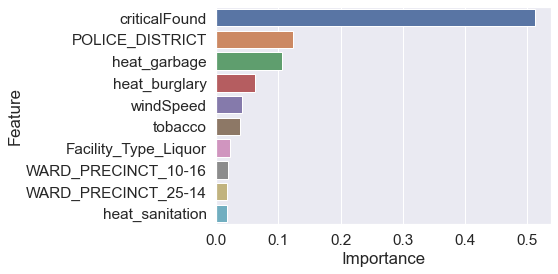

In [35]:
feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(dt_classifier.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]
sns.barplot(x = "Importance", y = "Feature", data = feat_importances.nlargest(10, 'Importance'))
plt.show()

In [39]:
y_pred = dt_classifier.predict(X_validate)

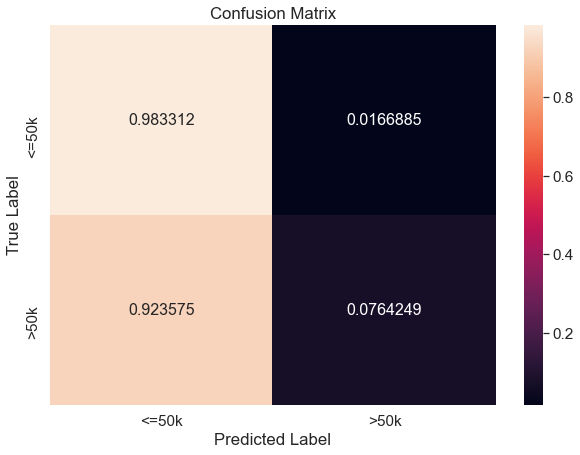

In [40]:

cf_matrix = confusion_matrix(y_validate, y_pred, normalize = "true")

df_cm = pd.DataFrame(cf_matrix, range(2),
                  range(2))

df_cm = df_cm.rename(index=str, columns={0: "<=50k", 1: ">50k"})
df_cm.index = ["<=50k", ">50k"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Validation Metrics

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

### Model 1 - SVM

In [20]:
range(len(svm_pred))

TP = 0
FP = 0
TN = 0
FN = 0

for i in range(len(svm_pred)): 
    if y_validate[i]==y_pred[i]==1:
       TP += 1
    if y_pred[i]==1 and y_validate[i]!=y_pred[i]:
       FP += 1
    if y_validate[i]==y_pred[i]==0:
       TN += 1
    if y_pred[i]==0 and y_pred[i]!=y_validate[i]:
       FN += 1

NameError: name 'svm_pred' is not defined

### Model 2 - Logistic Regression

In [ ]:
range(len(logit_pred_updated))

In [ ]:
TP = 0
FP = 0
TN = 0
FN = 0

for i in range(len(logit_pred_updated)): 
    if y_validate[i]==logit_pred_updated[i]==1:
       TP += 1
    if logit_pred_updated[i]==1 and y_validate[i]!=logit_pred_updated[i]:
       FP += 1
    if y_validate[i]==logit_pred_updated[i]==0:
       TN += 1
    if logit_pred_updated[i]==0 and y_pred[i]!=y_validate[i]:
       FN += 1

Accuracy:

In [ ]:
accuracy = (TP + TN)/(TP + TN + FP + FN)
print("Accuracy is", accuracy)

Precision: 

In [ ]:
precision = TP/(TP + FP)
print("Precision is", precision)

Recall: 

In [ ]:
recall = TP/(TP + FN)
print("Recall is", recall)

F1 Score: 

In [ ]:
f1 = 2 * (precision * recall)/(precision + recall)
print("F1 Score is", f1)

### Model 3 - Decision Tree

In [41]:
range(len(y_pred))

range(0, 3828)

In [42]:
## make sure this isn't using the last y_pred: should we rename them?



TP = 0
FP = 0
TN = 0
FN = 0

for i in range(len(y_pred)): 
    if y_validate[i]==y_pred[i]==1:
       TP += 1
    if y_pred[i]==1 and y_validate[i]!=y_pred[i]:
       FP += 1
    if y_validate[i]==y_pred[i]==0:
       TN += 1
    if y_pred[i]==0 and y_pred[i]!=y_validate[i]:
       FN += 1

In [43]:
accuracy = (TP + TN)/(TP + TN + FP + FN)
print("Accuracy is", accuracy)

Accuracy is 0.800417972831766


In [44]:
precision = TP/(TP + FP)
print("Precision is", precision)

Precision is 0.5363636363636364


In [45]:
recall = TP/(TP + FN)
print("Recall is", recall)

Recall is 0.07642487046632124


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.651


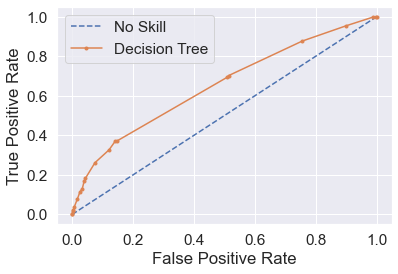

In [46]:
# roc curve and auc

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# split into train/test sets
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_validate))]


# predict probabilities for logistic regression
lr_probs = dt_classifier.predict_proba(X_validate)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_validate, ns_probs)
lr_auc = roc_auc_score(y_validate, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_validate, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_validate, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Decision Tree')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## Policy Simulation

### Interpretable Machine Learning

**Hint**: Use tools like feature importance plots and coefficient plots

## Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1000 observations at random

### Predict on Data with Unseen Labels

In [ ]:
# Fill in the code below with the X data you used for training
X_test = chicago_inspections_2014[chicago_inspections_2014.columns & ....columns]